<img src="https://www.scoutcam.com/wp-content/uploads/2021/05/Webp.net-resizeimage-24.jpg" width="250"/>


Imports:

In [1]:
# !pip install imutils

In [4]:
from __future__ import print_function
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt

In [5]:
def calc_middle_point(point1,point2):
    return ((point1[0]+point2[0])//2, (point1[1]+point2[1])//2) 

In [96]:
def calc_distance(point1,point2):
    dis = np.sqrt((point1[0]-point2[0])**2 + (point1[1]+point2[1])**2)
    print(f'Distance: {round(dis,2)} px')
    return dis

In [97]:
def center_rect(point1,point2):
    return calc_middle_point(point1,point2)

In [172]:
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
  
# fontScale
fontScale = 1
   
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2

In [ ]:
def check_valid(array_shapes):
    return len(array_shapes)<2

def show_image(image,size_x=10,size_y=10):
    plt.figure(figsize=(size_x,size_y))
    plt.imshow(image)  
    plt.show()

def show_image_with_line(image, point1, point2):
        img = cv2.line(image, point1, point2, color= (0, 255, 0),thickness=7)
        show_image(image)
    

In [182]:

def dis_two_circles(image, circles):
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    # show the output image - detect objects:
    # show_image(image)
    return circles
    
def contours_for_objects(image):
        lower = np.array([0, 93, 18], dtype="uint8")
        upper = np.array([255, 255, 45], dtype="uint8")
        mask = cv2.inRange(image, lower, upper)
       
        return cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    
def calc_dis_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.3, 100,maxRadius=500)
    
    # ensure at least some circles were found
    if circles is not None:
        if check_valid(circles[0]):
            print("No two circles were found")
            return
        
        circles = dis_two_circles(image,circles)
        
        # org
        org = calc_middle_point(circles[0],circles[1])

        # Distance
        distance = calc_distance(circles[0],circles[1])

        img = cv2.line(image, circles[0][:2], circles[1][:2], color= (0, 255, 0),thickness=7)
        show_image_with_line(cv2.putText(image, f'{int(distance)} px', org, font, fontScale, color, thickness, cv2.LINE_AA),circles[0][:2], circles[1][:2])
    
    # if two circles not  found
    else:

        contours,hierarchy = contours_for_objects(image)
        centers = []

        for cnt in contours:
            x,y,w,h = cv2.boundingRect(cnt)
            area = cv2.contourArea(cnt)

            if area > 30:
                cv2.rectangle(image, (x,y), (x+w, y+h), (255,255,0), 3)
                middel = calc_middle_point([x,y],[x+w, y+h])
                cv2.rectangle(image, (middel[0] - 5, middel[1] - 5), (middel[0] + 5, middel[1] + 5), (0, 128, 255), -1)
                centers.append(middel)
                
        if check_valid(centers):
            print("No two object in yellow were found")
            return
        
        img = cv2.line(image, centers[0], centers[1], color= (0, 255, 0),thickness=5)
        distance = calc_distance(centers[0],centers[1])
        show_image_with_line(cv2.putText(img, f'{int(distance)} px', calc_middle_point(centers[0], centers[1]), font, fontScale, color, thickness, cv2.LINE_AA),centers[0], centers[1])

image 1
Distance: 1302.35 px


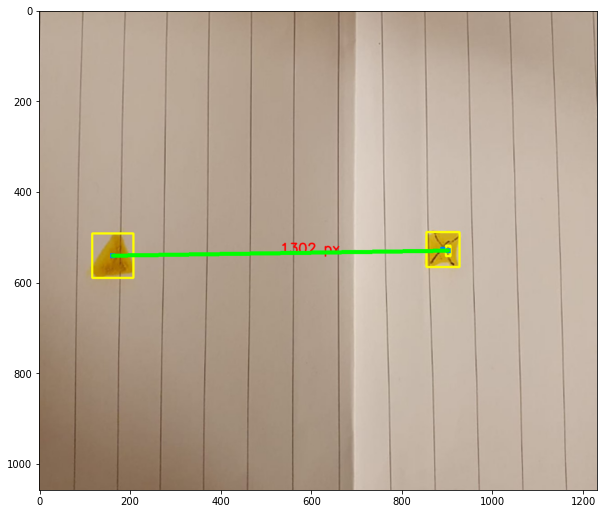

image 2
Distance: 585.4 px


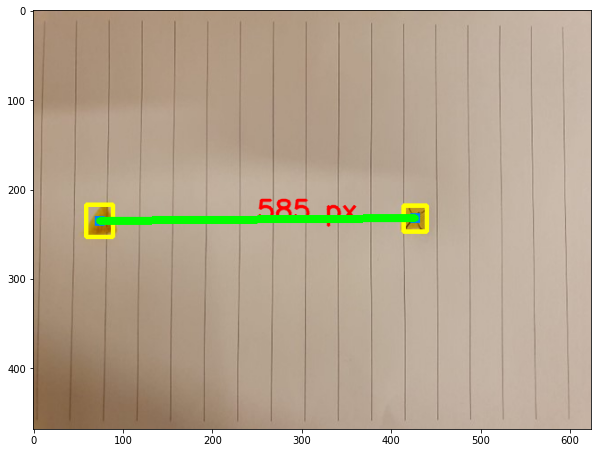

image 3
Distance: 2057.2 px


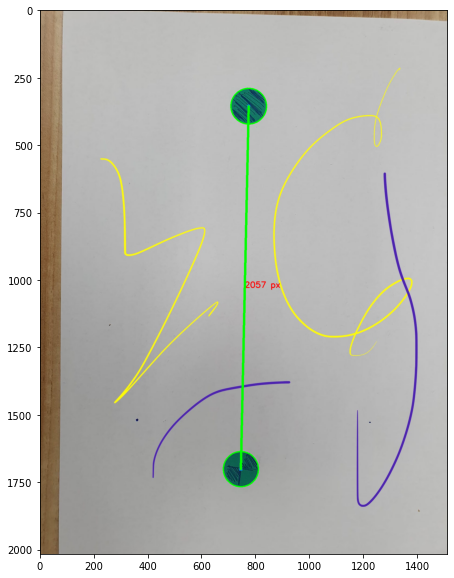

image 4
Distance: 1723.02 px


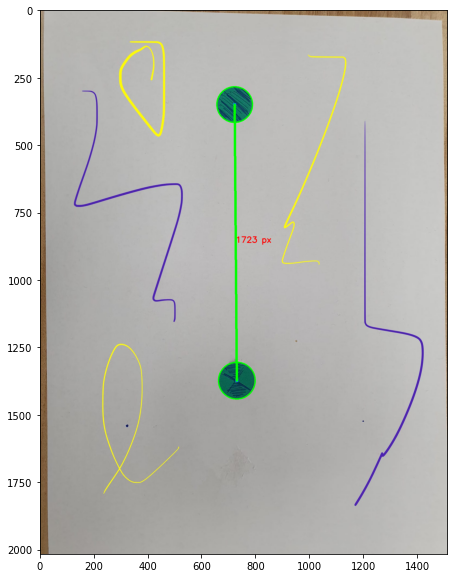

image 5
Distance: 2047.23 px


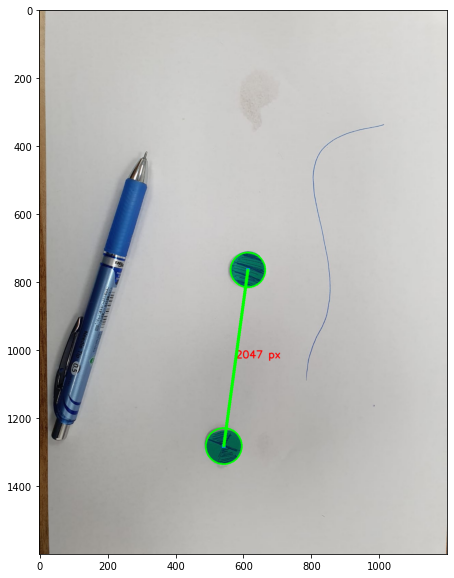

In [183]:
for i in range(1,6):
    print(f'image {i}')
    image = plt.imread(f'image{i}.jpg')
    calc_dis_image(image)